<h2 id="problem_statement">1. Problem Statement</h2>

Uncover the factors that affect Diamond prices.

### What is the major factors affecting Diamond prices

To predict Diamond prices

### Import the dataset

This dataset was hosted on Kaggle. Click <a href="https://www.kaggle.com/datasets/shivam2503/diamonds">HERE</a>.


## Diamond data information
This classic dataset contains the prices and other attributes of almost 54,000 diamonds. There are 10 attributes included in the dataset including the target ie. price.

Feature description:

price price in US dollars ($326--$18,823)This is the target column containing tags for the features. 

The 4 Cs of Diamonds:-

carat (0.2--5.01) The carat is the diamond’s physical weight measured in metric carats.  One carat equals 1/5 gram and is subdivided into 100 points. Carat weight is the most objective grade of the 4Cs. 

cut (Fair, Good, Very Good, Premium, Ideal) In determining the quality of the cut, the diamond grader evaluates the cutter’s skill in the fashioning of the diamond. The more precise the diamond is cut, the more captivating the diamond is to the eye.  

color, from J (worst) to D (best) The colour of gem-quality diamonds occurs in many hues. In the range from colourless to light yellow or light brown. Colourless diamonds are the rarest. Other natural colours (blue, red, pink for example) are known as "fancy,” and their colour grading is different than from white colorless diamonds.  

clarity (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)) Diamonds can have internal characteristics known as inclusions or external characteristics known as blemishes. Diamonds without inclusions or blemishes are rare; however, most characteristics can only be seen with magnification.  

Dimensions

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

Let's load required libraries

In [1]:
#!pip install xgboost

In [2]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
import sklearn.tree as tree
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pylab as pl
import numpy as np
%matplotlib inline

## Load our dataset

In [3]:
df = pd.read_csv("../input/diamonds/diamonds.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#### Lets drop the Unnamed Column

In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [6]:
df.shape

(53940, 10)

In [7]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [8]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Points to notice:

Min value of "x", "y", "z" are zero this indicates that there are faulty values in data that represents dimensionless or 2-dimensional diamonds. So we need to filter out those as it clearly faulty data points.

In [9]:
#Dropping dimentionless diamonds
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)
df.shape

(53920, 10)

In [10]:
df.describe(include='object')

,cut,color,clarity
count,53920,53920,53920
unique,5,7,8
top,Ideal,G,SI1
freq,21548,11284,13063


In [11]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [12]:
df['price'].max()

18823

## Numeric Distribution

In [13]:
numCols = df.select_dtypes([np.number]).columns.drop("price")
numCols

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

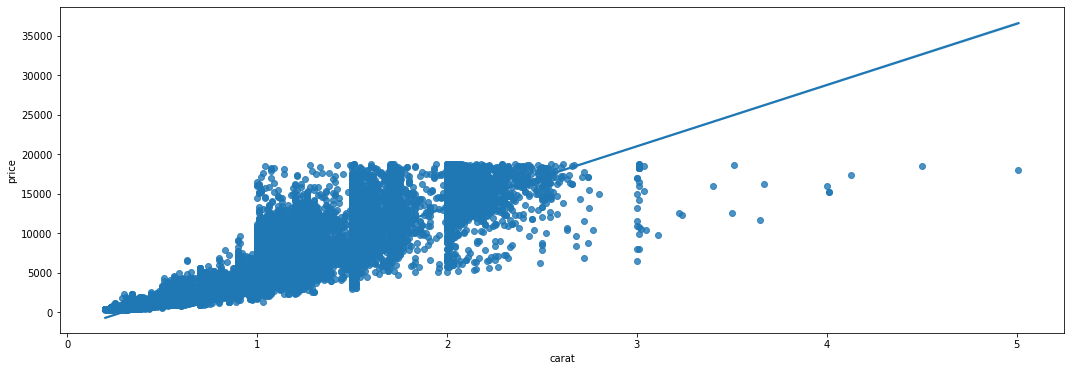

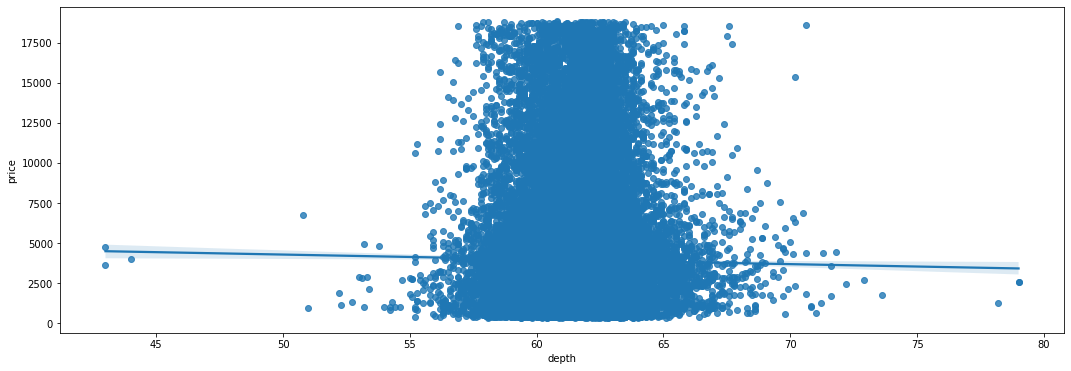

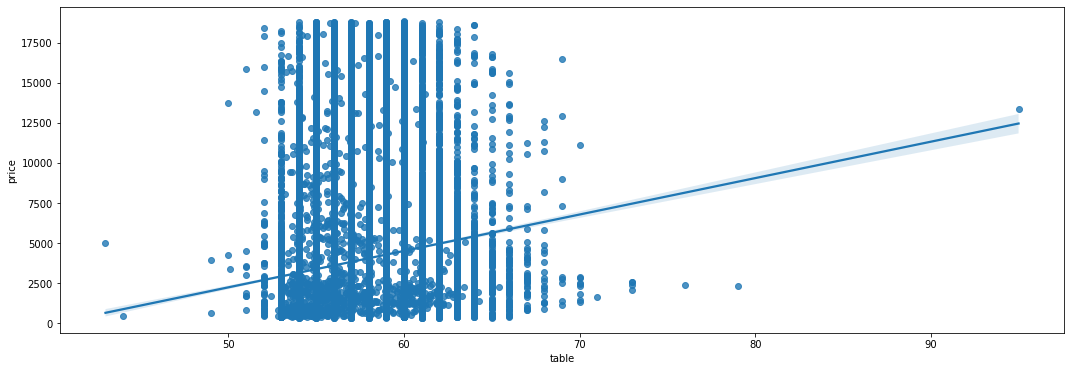

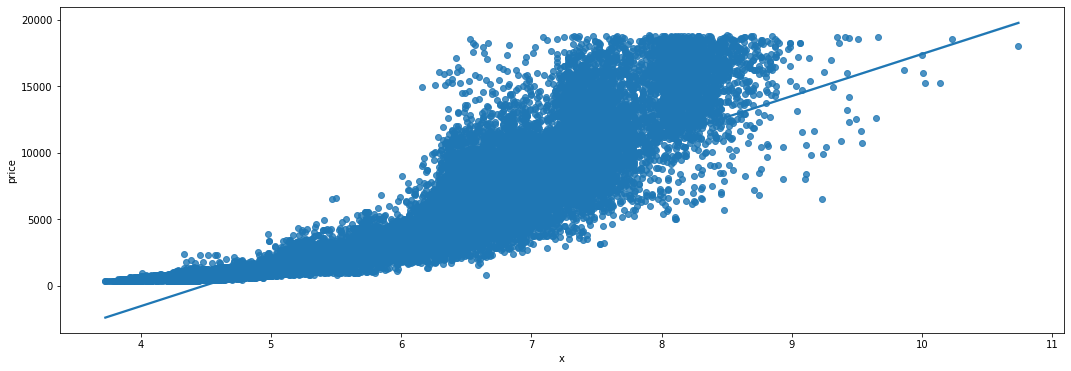

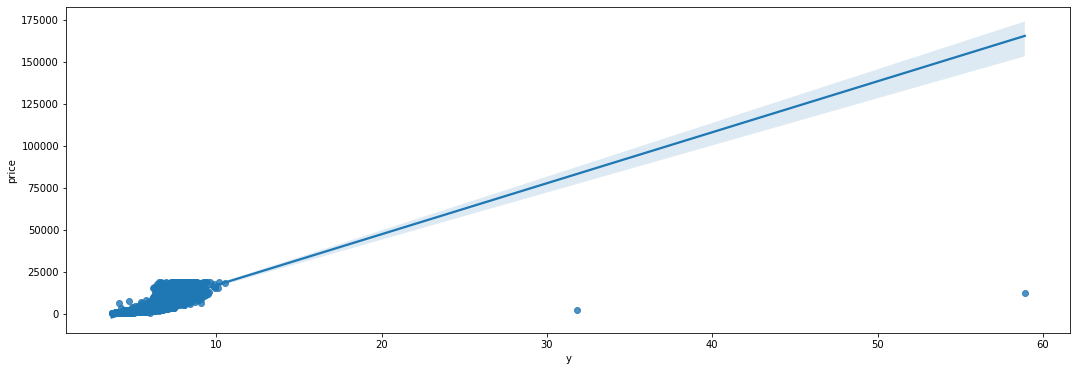

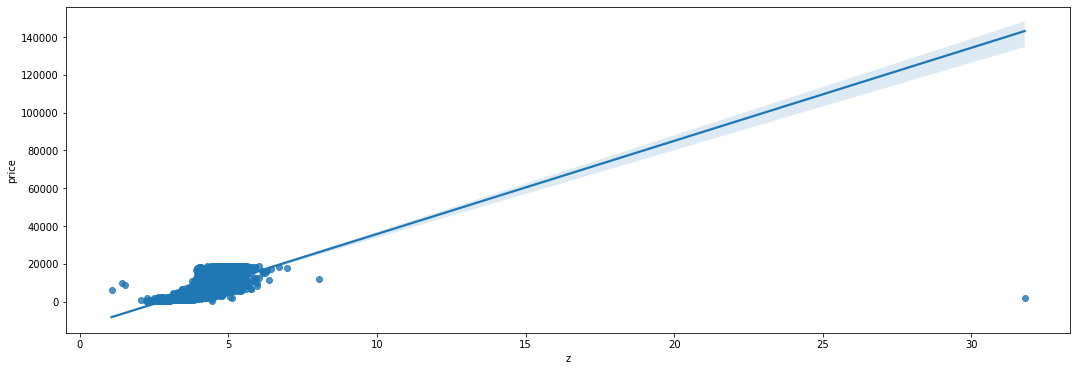

In [14]:
for col in numCols:
    plt.figure(figsize=(18,6))
    sns.regplot(x=col, y="price", data=df)
    plt.show()

### Lets Check for  Outliers using boxplots

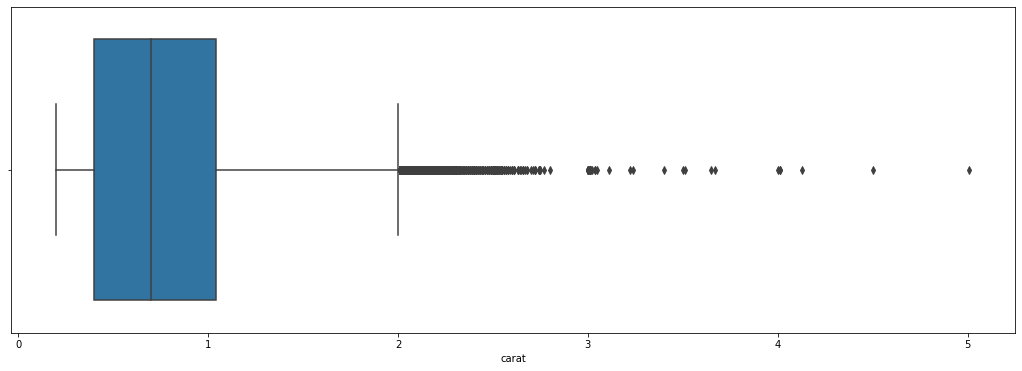

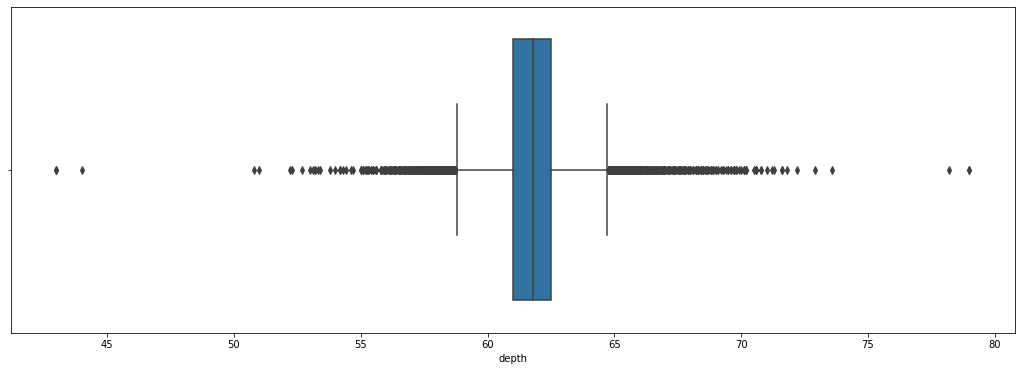

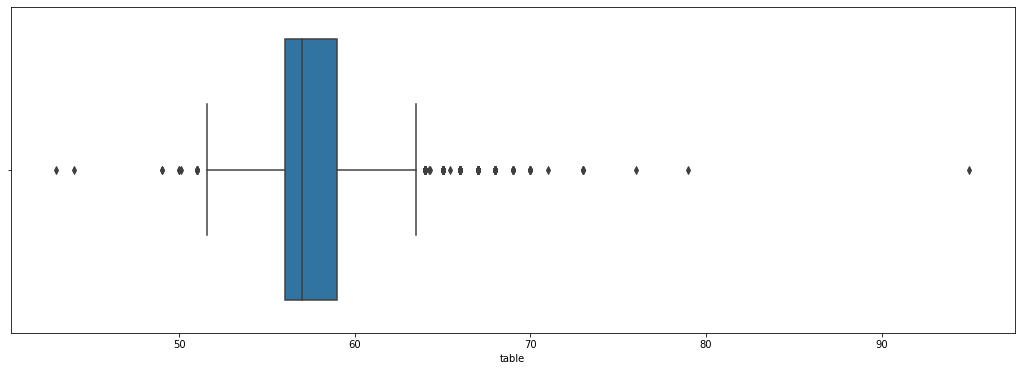

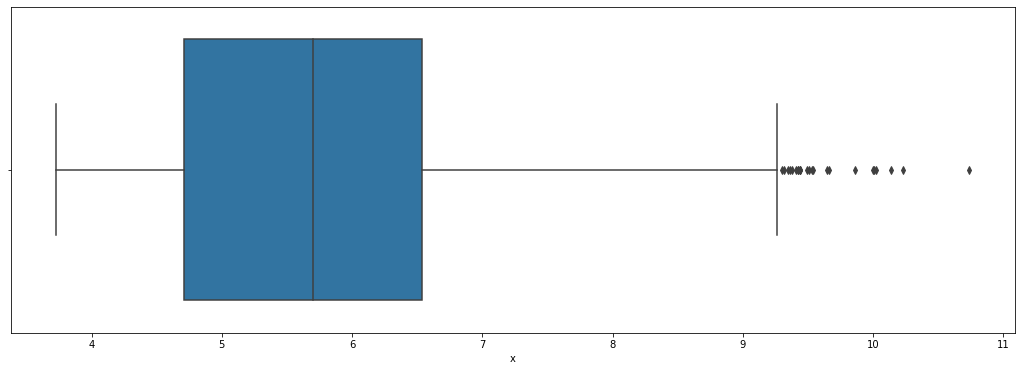

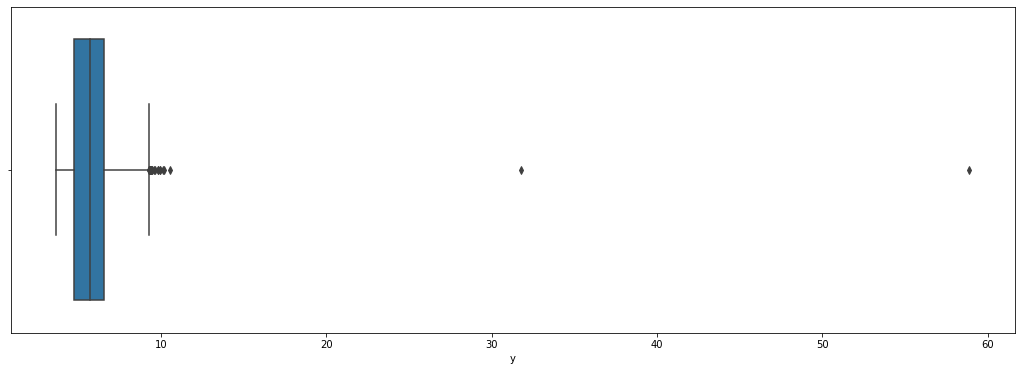

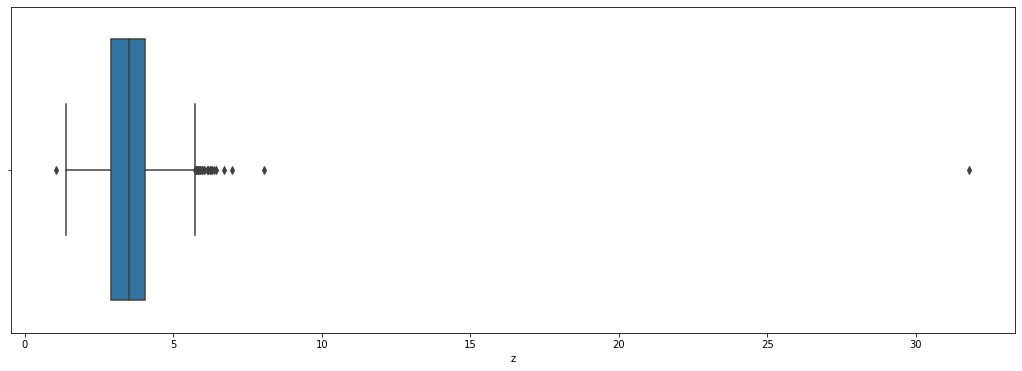

In [15]:
for col in numCols:
    plt.figure(figsize=(18,6))
    sns.boxplot(x=col, data=df)
    plt.show()

We can clearly spot outliers in these attributes. Next up, we will remove these data points.

In [16]:
# Removing outliers
q1 = df['carat'].quantile(0.25)
q3 = df['carat'].quantile(0.75)
iqr = q3 - q1
toprange = q3 + iqr * 1.5
botrange = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'carat'] > toprange:
        df.loc[i, 'carat'] = toprange
    if df.loc[i, 'carat'] < botrange:
        df.loc[i, 'carat'] = botrange

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Cleaning values')

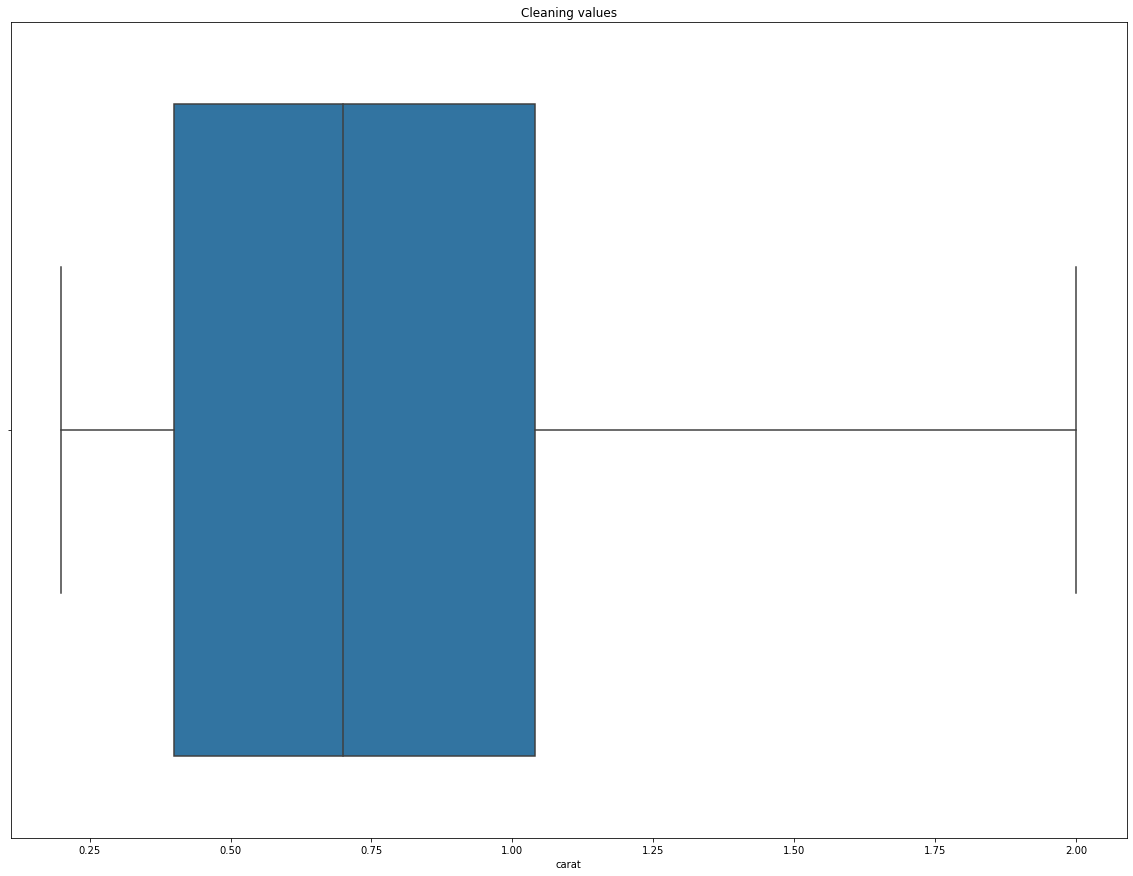

In [17]:
# Carat column after cleaning
plt.figure(figsize=(20, 15))
sns.boxplot(df['carat'], labels=['carat'])
plt.title('Cleaning values')

In [18]:
# Removing outliers
q1 = df['depth'].quantile(0.25)
q3 = df['depth'].quantile(0.75)
iqr = q3 - q1
toprange = q3 + iqr * 1.5
botrange = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'depth'] > toprange:
        df.loc[i, 'depth'] = toprange
    if df.loc[i, 'depth'] < botrange:
        df.loc[i, 'depth'] = botrange

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Cleaning values')

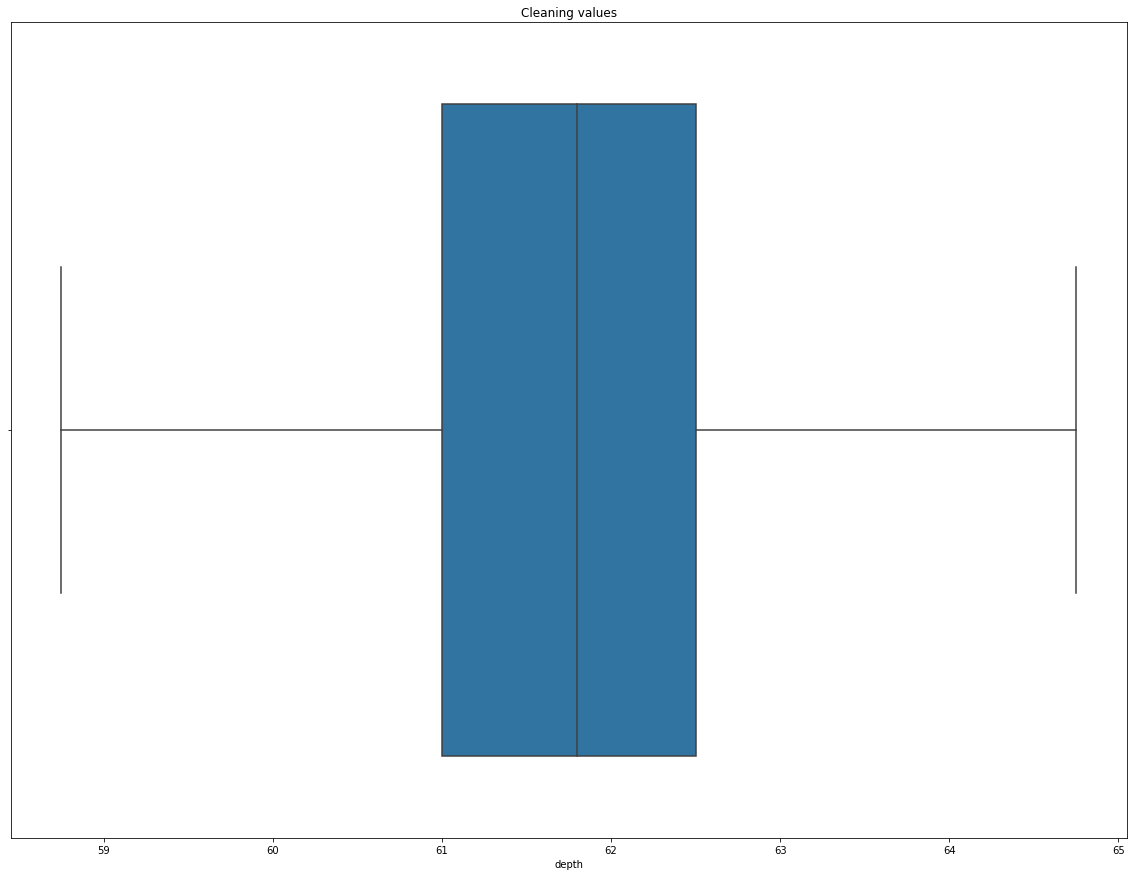

In [19]:
# Depth column after cleaning
plt.figure(figsize=(20, 15))
sns.boxplot(df['depth'], labels=['depth'])
plt.title('Cleaning values')

In [20]:
# Removing outliers
q1 = df['table'].quantile(0.25)
q3 = df['table'].quantile(0.75)
iqr = q3 - q1
toprange = q3 + iqr * 1.5
botrange = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'table'] > toprange:
        df.loc[i, 'table'] = toprange
    if df.loc[i, 'table'] < botrange:
        df.loc[i, 'table'] = botrange

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Cleaning values')

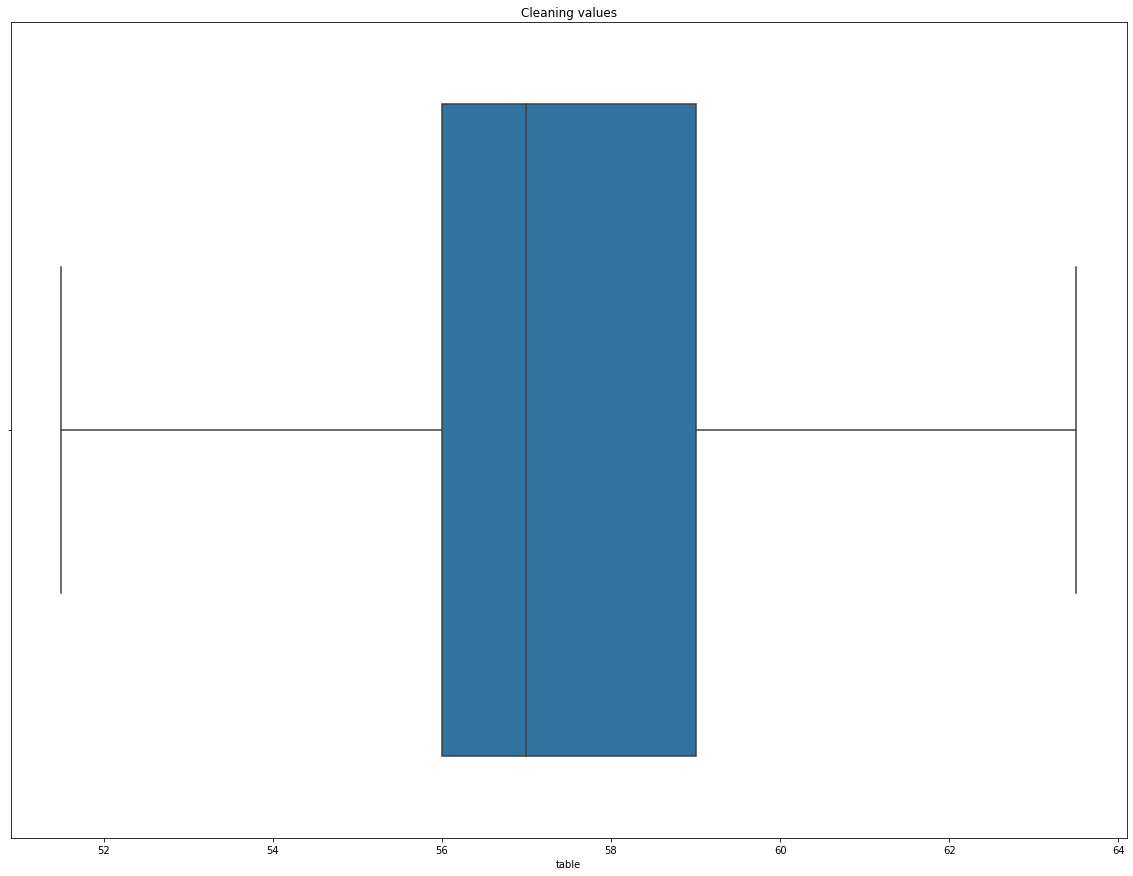

In [21]:
# Table column after cleaning
plt.figure(figsize=(20, 15))
sns.boxplot(df['table'], labels=['table'])
plt.title('Cleaning values')

In [22]:
# Removing outliers
q1 = df['x'].quantile(0.25)
q3 = df['x'].quantile(0.75)
iqr = q3 - q1
toprange = q3 + iqr * 1.5
botrange = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'x'] > toprange:
        df.loc[i, 'x'] = toprange
    if df.loc[i, 'x'] < botrange:
        df.loc[i, 'x'] = botrange

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Cleaning values')

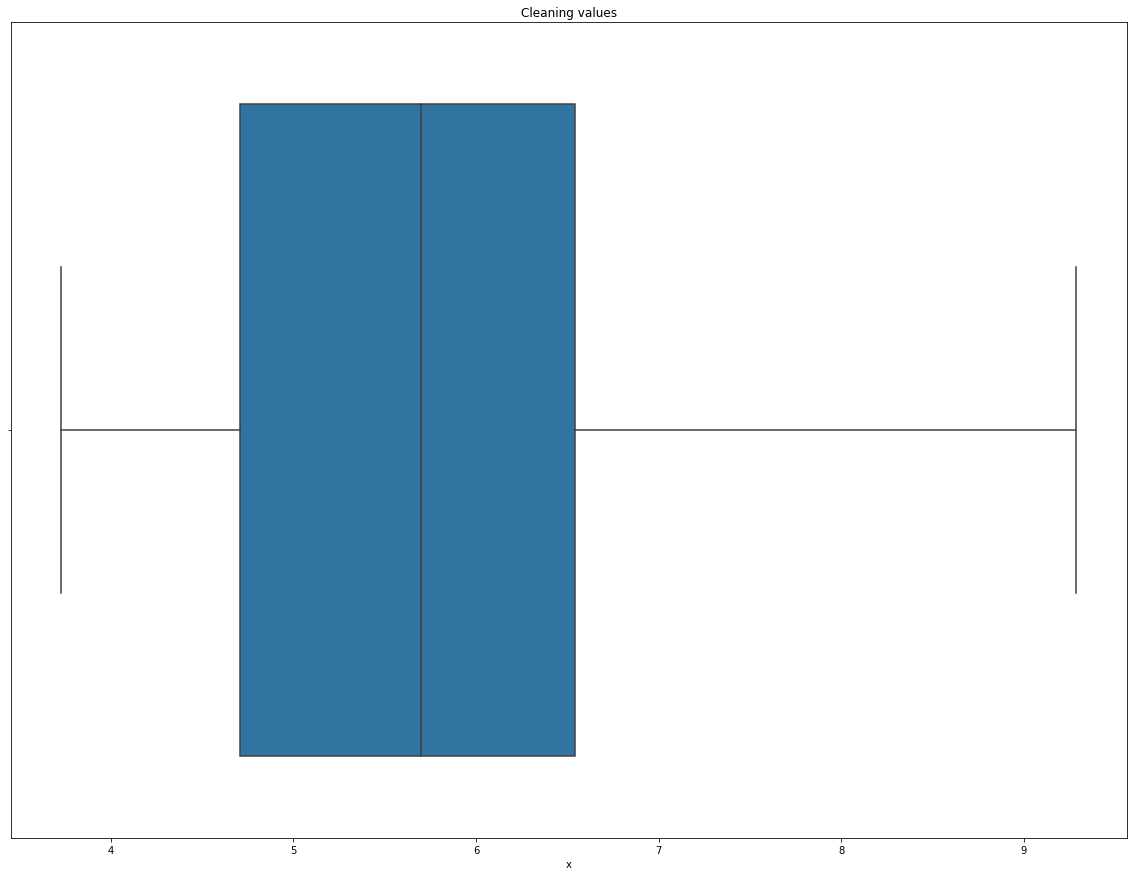

In [23]:
# X column after cleaning
plt.figure(figsize=(20, 15))
sns.boxplot(df['x'], labels=['x'])
plt.title('Cleaning values')

In [24]:
# Removing outliers
q1 = df['y'].quantile(0.25)
q3 = df['y'].quantile(0.75)
iqr = q3 - q1
toprange = q3 + iqr * 1.5
botrange = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'y'] > toprange:
        df.loc[i, 'y'] = toprange
    if df.loc[i, 'y'] < botrange:
        df.loc[i, 'y'] = botrange

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Cleaning values')

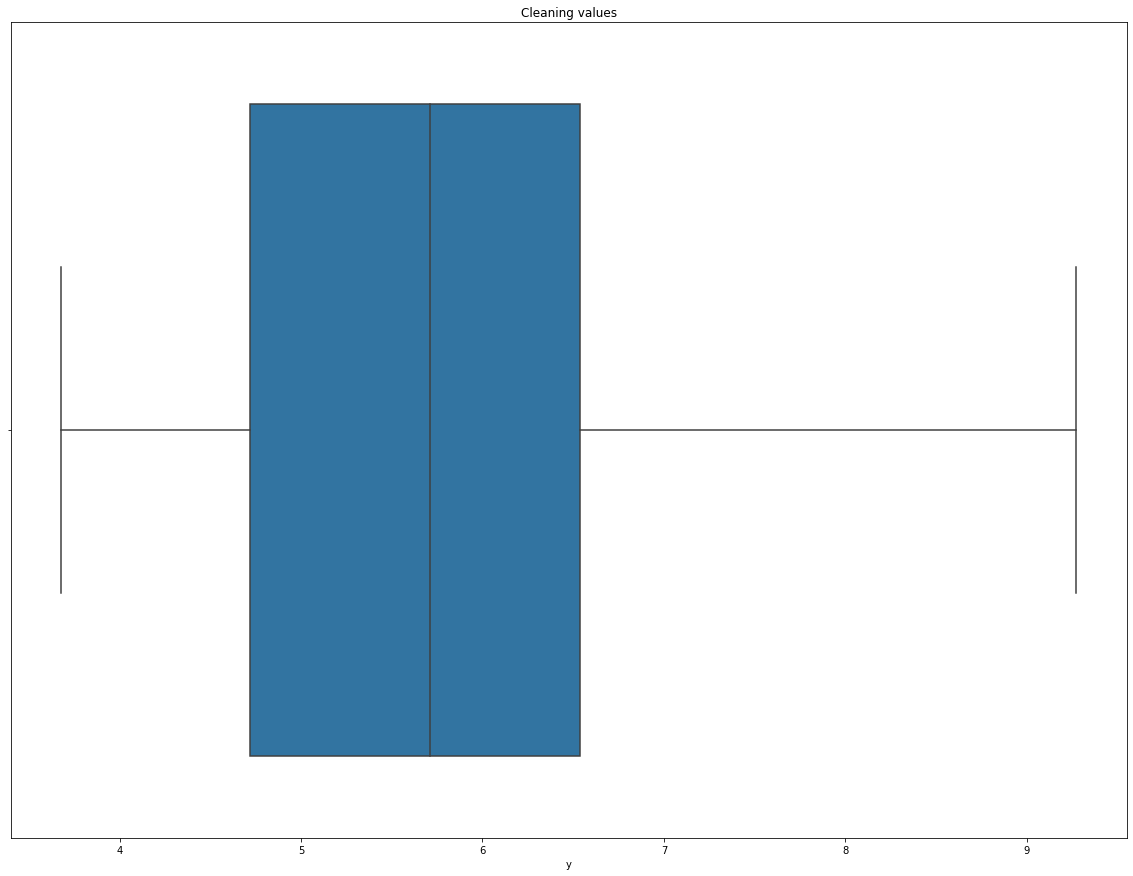

In [25]:
# Y column after cleaning
plt.figure(figsize=(20, 15))
sns.boxplot(df['y'], labels=['y'])
plt.title('Cleaning values')

In [26]:
# Removing outliers
q1 = df['z'].quantile(0.25)
q3 = df['z'].quantile(0.75)
iqr = q3 - q1
toprange = q3 + iqr * 1.5
botrange = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'z'] > toprange:
        df.loc[i, 'z'] = toprange
    if df.loc[i, 'z'] < botrange:
        df.loc[i, 'z'] = botrange

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Cleaning values')

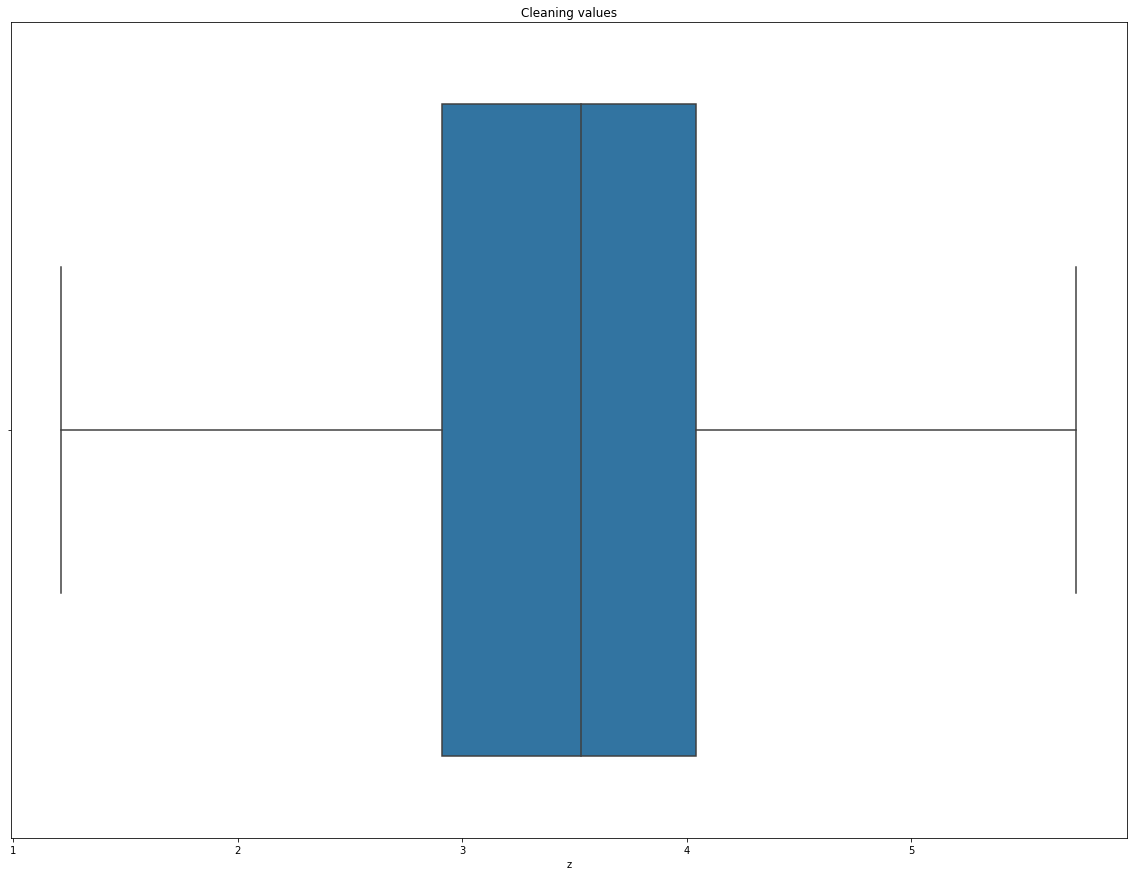

In [27]:
# Z column after cleaning
plt.figure(figsize=(20, 15))
sns.boxplot(df['z'], labels=['z'])
plt.title('Cleaning values')

In [28]:
df.shape

(53920, 10)

### Another method of removing outliers

In [29]:
#Dropping the outliers. 
#df = df[(df["depth"]<75)&(df["depth"]>45)]
#df = df[(df["table"]<80)&(df["table"]>40)]
#df = df[(df["x"]<30)]
#df = df[(df["y"]<30)]
#df = df[(df["z"]<30)&(df["z"]>2)]
#df.shape

### Categorical Count Plot

In [30]:
objCols = df.select_dtypes(['object']).columns
objCols

Index(['cut', 'color', 'clarity'], dtype='object')

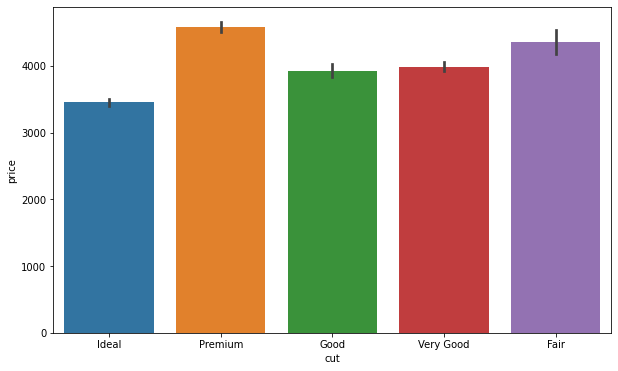

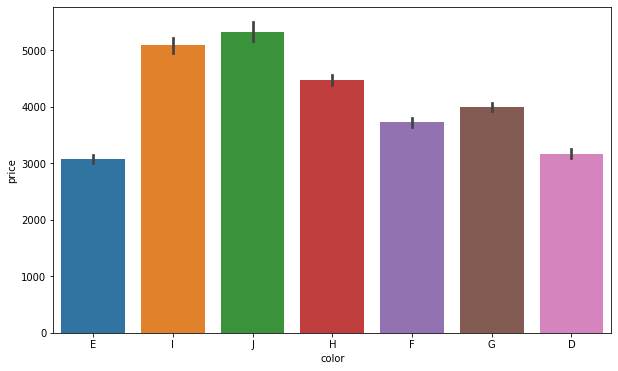

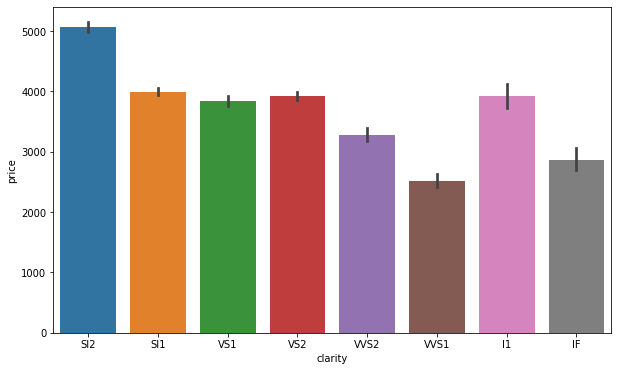

In [31]:
for col in objCols:
    plt.figure(figsize=(10,6))
    sns.barplot(x=col, y="price", data=df)
    plt.show()

In [32]:
df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.021918,0.187551,0.922513,0.983207,0.982335,0.981521
depth,0.021918,1.000000,-0.299941,-0.012623,-0.028633,-0.031344,0.090020
table,0.187551,-0.299941,1.000000,0.130509,0.198716,0.192803,0.158980
price,0.922513,-0.012623,0.130509,1.000000,0.887235,0.888708,0.882006
x,0.983207,-0.028633,0.198716,0.887235,1.000000,0.998519,0.990927
y,0.982335,-0.031344,0.192803,0.888708,0.998519,1.000000,0.990661
z,0.981521,0.090020,0.158980,0.882006,0.990927,0.990661,1.000000


 x=lenght, y= width, z=height
 color D= Best, J= Worst
 depth % :The height of a diamond, measured from the culet to the table, divided by its average girdle diameter
 table%: The width of the diamond's table expressed as a percentage of its average diameter

In [33]:
# Lets make a copy of our dataset as df1
df1 = df.copy()
df1.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.50,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.80,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,58.75,63.5,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.40,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.30,58.0,335,4.34,4.35,2.75


### Encode categorical values

In [34]:
label_encoder = LabelEncoder()  # create a label encoder Object

df1['cut'] = label_encoder.fit_transform(df1['cut'])
df1['color'] = label_encoder.fit_transform(df1['color'])
df1['clarity'] = label_encoder.fit_transform(df1['clarity'])

In [35]:
df1.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.50,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.80,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,58.75,63.5,327,4.05,4.07,2.31
3,0.29,3,5,5,62.40,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.30,58.0,335,4.34,4.35,2.75


### Correlation

<AxesSubplot:>

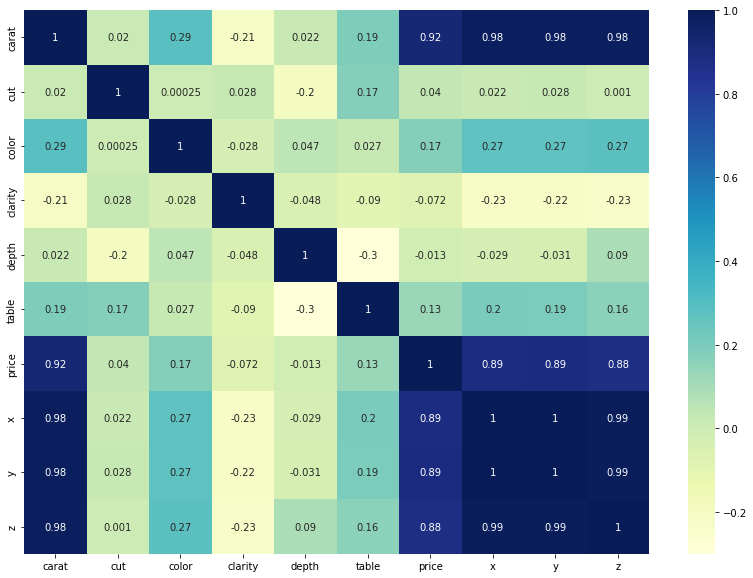

In [36]:
plt.figure(figsize = (14,10))
sns.heatmap(df1.corr() , annot = True , cmap = "YlGnBu")

### Feature Selection
less than 5% not accepted as a feature but lets allow all 

In [37]:
round(abs(df1.corr()['price']*100).sort_values(ascending=False), 2)

price      100.00
carat       92.25
y           88.87
x           88.72
z           88.20
color       17.24
table       13.05
clarity      7.16
cut          3.99
depth        1.26
Name: price, dtype: float64

<AxesSubplot:>

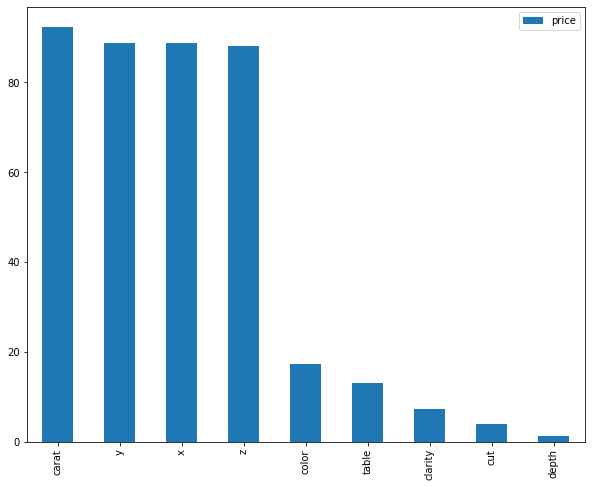

In [38]:
pd.DataFrame(abs(df1.corr()['price'].drop('price')*100).sort_values(ascending=False)).plot.bar(figsize = (10,8))

### Modeling

### 1. Using Linear Regression
* Multiple Linear Regression

In [39]:
columns = ['carat','y','x','z','color','table','clarity','cut','depth']
X = df1[columns]
y = df1[['price']]

In [40]:
# Standard scaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X =pd.DataFrame(X,columns=columns)
X.head()

,carat,y,x,z,color,table,clarity,cut,depth
0,-1.230646,-1.578275,-1.592240,-1.605053,-0.936971,-1.128368,-0.484445,-0.538173,-0.196252
1,-1.274415,-1.704292,-1.645867,-1.778672,-0.936971,1.648276,-1.064312,0.434877,-1.534888
2,-1.230646,-1.497265,-1.502862,-1.778672,-0.936971,2.805211,0.095422,-1.511224,-2.361693
3,-1.099342,-1.353246,-1.368794,-1.315688,1.414232,0.259954,0.675289,0.434877,0.512438
4,-1.055573,-1.245232,-1.243665,-1.142069,2.002033,0.259954,-0.484445,-1.511224,1.221128


### Training and Test Sets

In [41]:
# Create a training and testing dataset with 30% test set

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [42]:
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 16176
number of training samples: 37744


In [43]:
# Creating a linear Regression Object
lre=LinearRegression()

In [44]:
lre.fit(x_train[columns], y_train)

LinearRegression()

Prediction using training data:

In [45]:
yhat_train = lre.predict(x_train[columns])
yhat_train[:5]

array([[ 955.48338976],
       [4820.67085559],
       [ 927.5494478 ],
       [ 727.17631109],
       [ 427.26057422]])

Prediction using test data:

In [46]:
yhat_test = lre.predict(x_test[columns])
yhat_test[:5]

array([[7969.72790631],
       [1524.58056327],
       [4745.95740944],
       [ 359.25867513],
       [6252.99216049]])

In [47]:
# Libraries for plotting
from ipywidgets import interact, interactive, fixed, interact_manual

def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Diamond')

    plt.show()
    plt.close()
    

def PollyPlot(xtrain, xtest, y_train, y_test, lre,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lre:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


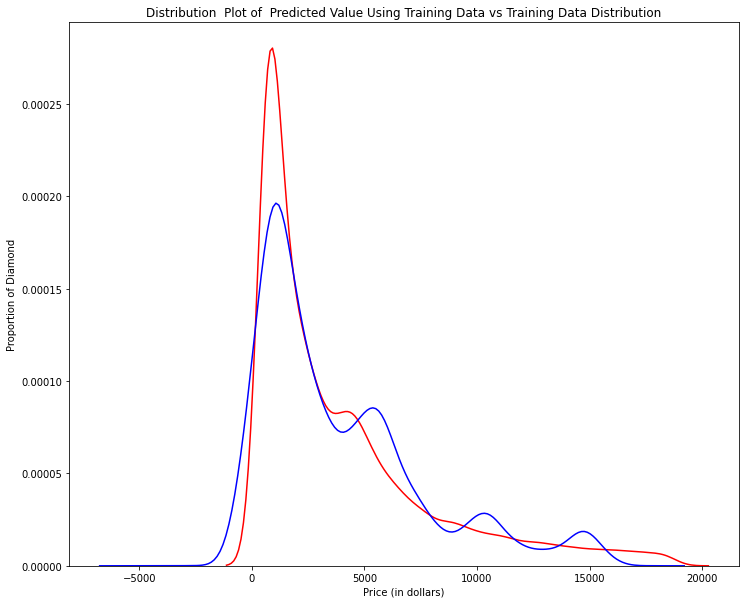

In [48]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

Figure 1: Plot of predicted values using the training data compared to the actual values of the training data.
* So far, the model seems to be doing well in learning from the training dataset. But what happens when the model encounters new data from the testing dataset? When the model generates new values from the test data, we see the distribution of the predicted values is much different from the actual target values

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


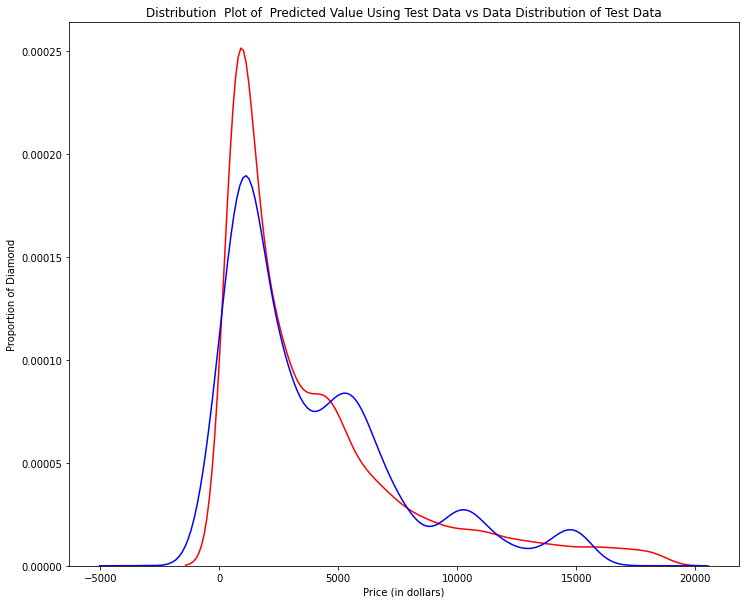

In [49]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Figure 2: Plot of predicted value using the test data compared to the actual values of the test data.

* Comparing Figure 1 and Figure 2, they show similarity

In [50]:
mean_squared_error(y_train,yhat_train)

1632975.1201311445

In [51]:
mean_squared_error(y_test,yhat_test)

1704000.5861143684

In [52]:
lre.score(x_train,y_train)

0.8967666352779612

In [53]:
# Building pipelins of standard scaler and model for varios regressors.

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",XGBRegressor())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(x_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


In [54]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, x_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -1278.183233 
DecisionTree: -770.865542 


/opt/conda/lib/python3.7/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/opt/conda/lib/python3.7/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/opt/conda/lib/python3.7/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/opt/conda/lib/python3.7/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sh

RandomForest: -561.799176 
KNeighbors: -824.433321 
XGBRegressor: -558.906225 


Testing the Model with the best score on the test set

In the above scores, XGBClassifier appears to be the model with the best scoring on negative root mean square error. Let's test this model on a test set and evaluate it with different parameters.

In [55]:
# Model prediction on test data using XGBOOST
pred = pipeline_xgb.predict(x_test)

In [56]:
# Model Evaluation XGBClassifier
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.9811683463402251
Adjusted R^2: 0.9811578623068874
MAE: 280.8565578687085
MSE: 302882.38912888773
RMSE: 550.3475166918515


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


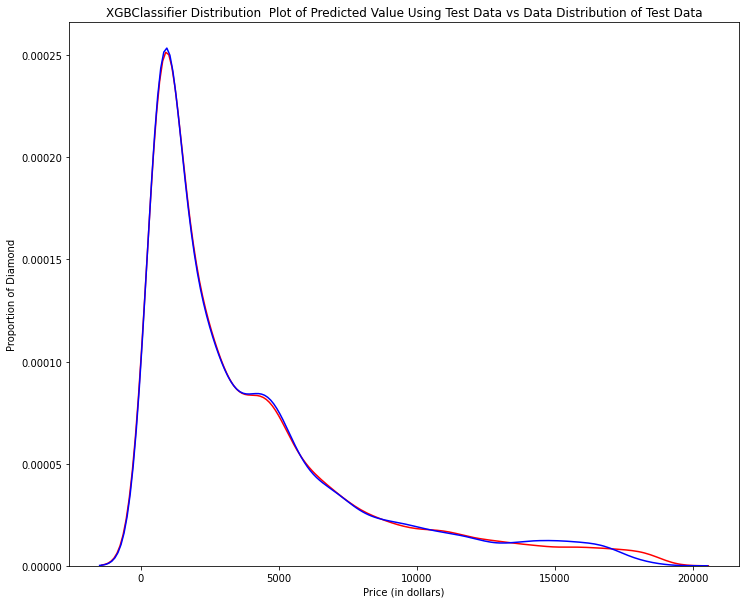

In [57]:
Title='XGBClassifier Distribution  Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,pred,"Actual Values (Test)","Predicted Values (Test)",Title)

In [58]:
predr = pipeline_rf.predict(x_test)

In [59]:
# Model Evaluation Random Forest Regressor
print("R^2:",metrics.r2_score(y_test, predr))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, predr))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, predr))
print("MSE:",metrics.mean_squared_error(y_test, predr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predr)))

R^2: 0.9819054190765883
Adjusted R^2: 0.9818953453893243
MAE: 269.5672405584699
MSE: 291027.5432728214
RMSE: 539.4696870750213


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


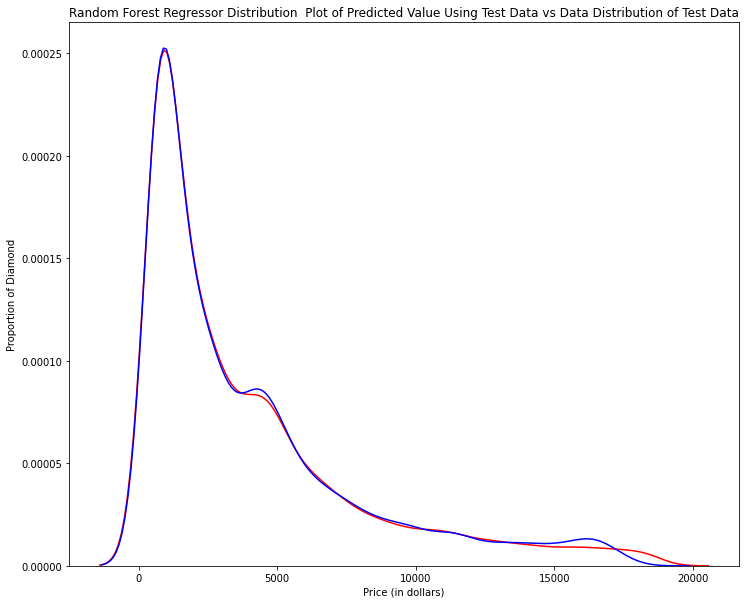

In [60]:
Title='Random Forest Regressor Distribution  Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,predr,"Actual Values (Test)","Predicted Values (Test)",Title)

In [61]:
predl = pipeline_lr.predict(x_test)

In [62]:
# Model Evaluation Linear Regressor
print("R^2:",metrics.r2_score(y_test, predl))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, predl))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, predl))
print("MSE:",metrics.mean_squared_error(y_test, predl))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predl)))

R^2: 0.894054094838429
Adjusted R^2: 0.8939951122115297
MAE: 839.6260836990721
MSE: 1704000.586114368
RMSE: 1305.373734267075


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


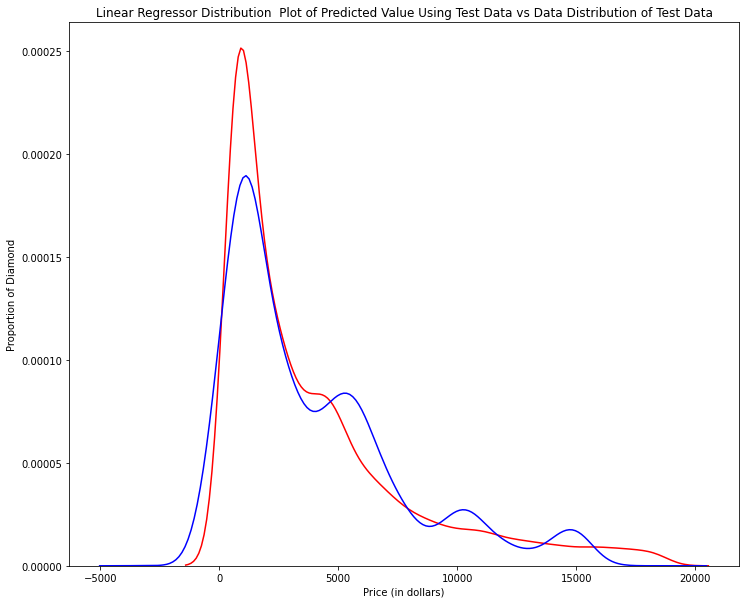

In [63]:
Title='Linear Regressor Distribution  Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,predl,"Actual Values (Test)","Predicted Values (Test)",Title)

In [64]:
predt =pipeline_dt.predict(x_test)

In [65]:
# Model Evaluation for Decision Tree Regressor
print("R^2:",metrics.r2_score(y_test, predt))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, predt))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, predt))
print("MSE:",metrics.mean_squared_error(y_test, predt))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predt)))

R^2: 0.9660283981328948
Adjusted R^2: 0.9660094853272035
MAE: 366.395740603363
MSE: 546388.5499350891
RMSE: 739.1809994413338


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


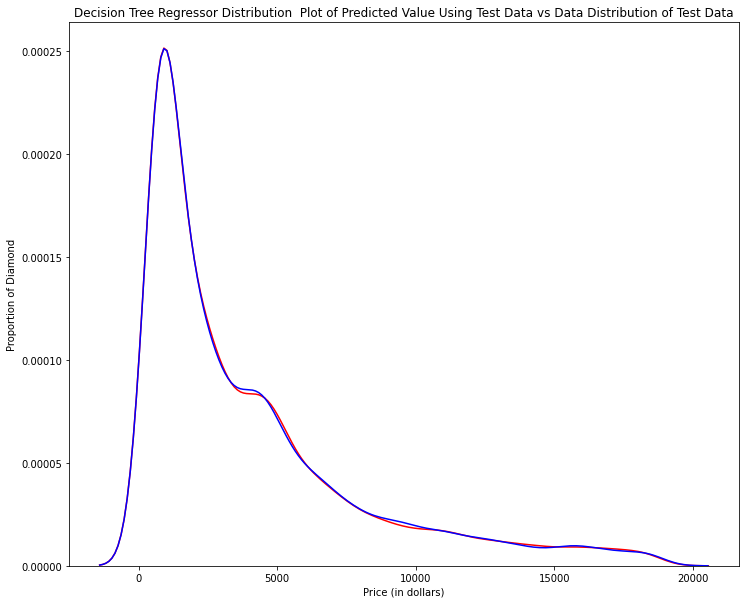

In [66]:
Title='Decision Tree Regressor Distribution  Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,predt,"Actual Values (Test)","Predicted Values (Test)",Title)

In [67]:
predk = pipeline_kn.predict(x_test)

In [68]:
# Model Evaluation for K Neighbor Regressor
print("R^2:",metrics.r2_score(y_test, predk))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, predk))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, predk))
print("MSE:",metrics.mean_squared_error(y_test, predk))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predk)))

R^2: 0.9558349846575118
Adjusted R^2: 0.9558103969340129
MAE: 418.47125370919883
MSE: 710336.2033160238
RMSE: 842.8144536705714


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


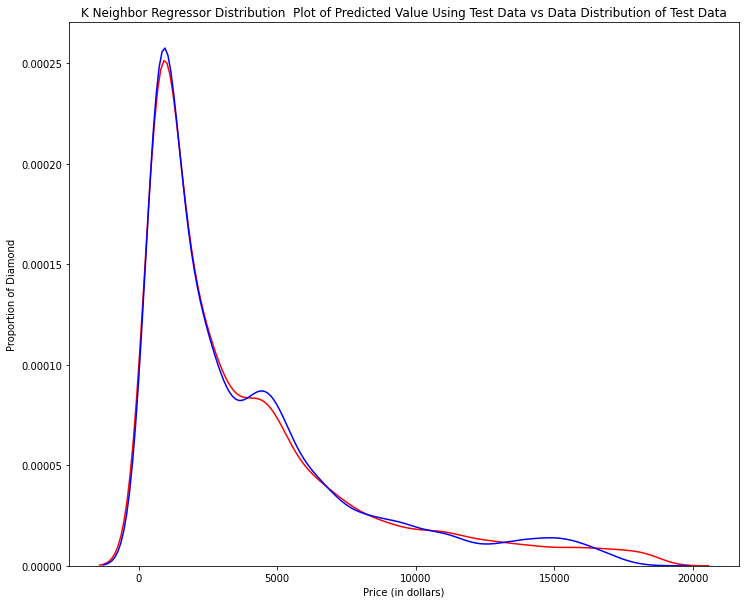

In [69]:
Title='K Neighbor Regressor Distribution  Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,predk,"Actual Values (Test)","Predicted Values (Test)",Title)

In all **XGBOOST REGRESSOR** and **RANDOM FOREST REGRESSOR** are of higher **R SCORE**